# Plotting with Matplotlib
Use Matplotlib to create bar charts that visualize the conclusions you made with groupby and query.

In [2]:
# Import necessary packages and load `winequality_edited.csv`
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('winequality_edited.csv')
df.head()

,alcohol,chlorides,citric_acid,color,density,fixed_acidity,free_sulfur_dioxide,pH,quality,residual_sugar,sulphates,total_sulfur-dioxide,total_sulfur_dioxide,volatile_acidity,acidity_levels
0,8.8,0.045,0.36,white,1.0010,7.0,45.0,3.00,6,20.7,0.45,NaN,170.0,0.27,High
1,9.5,0.049,0.34,white,0.9940,6.3,14.0,3.30,6,1.6,0.49,NaN,132.0,0.30,Medium
2,10.1,0.050,0.40,white,0.9951,8.1,30.0,3.26,6,6.9,0.44,NaN,97.0,0.28,Medium
3,9.9,0.058,0.32,white,0.9956,7.2,47.0,3.19,6,8.5,0.40,NaN,186.0,0.23,Moderately High
4,9.9,0.058,0.32,white,0.9956,7.2,47.0,3.19,6,8.5,0.40,NaN,186.0,0.23,Moderately High


### #1: Do wines with higher alcoholic content receive better ratings?
Create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples. This first one is filled out for you.

In [3]:
# Use query to select each group and get its mean quality
median = df['alcohol'].median()
low = df.query('alcohol < {}'.format(median))
high = df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

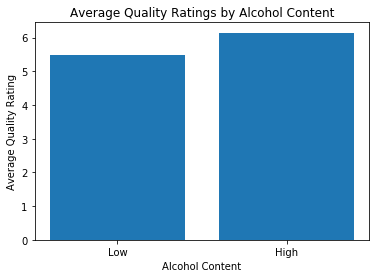

In [4]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### #2: Do sweeter wines receive higher ratings?
Create a bar chart with one bar for low residual sugar and one bar for high residual sugar wine samples.

In [14]:
# Use query to select each group and get its mean quality
median = df['residual_sugar'].median()

low_sugar = df.query('residual_sugar < {}'.format(median))
high_sugar = df.query('residual_sugar >= {}'.format(median))

avg_low = low_sugar['quality'].mean()
avg_high = high_sugar['quality'].mean()

print(avg_low, avg_high)

5.80880074372 5.82782874618


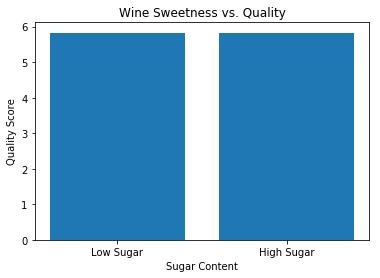

In [13]:
# Create a bar chart with proper labels

locations = [1,2]
x_axis = ['Low Sugar', 'High Sugar']
y_axis = [avg_low, avg_high]

plt.bar(locations, y_axis, tick_label=x_axis)
plt.title('Wine Sweetness vs. Quality')
plt.xlabel('Sugar Content')
plt.ylabel('Quality Score');



### #3: What level of acidity receives the highest average rating?
Create a bar chart with a bar for each of the four acidity levels.

In [28]:
# Use groupby to get the mean quality for each acidity level

acidity_level_avg_quality = df.groupby('acidity_levels')['quality'].mean()
#moderately_high = df.groupby('acidity_levels')['quality'].mean()[1]
#medium = df.groupby('acidity_levels')['quality'].mean()[2]
#low = df.groupby('acidity_levels')['quality'].mean()[3]

acidity_level_avg_quality

acidity_levels
High               5.783343
Low                5.859593
Medium             5.850832
Moderately High    5.784540
Name: quality, dtype: float64

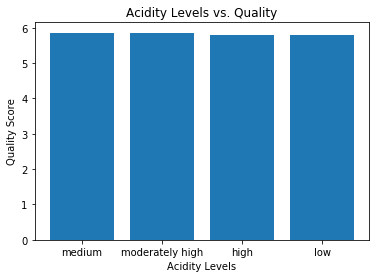

In [31]:
# Create a bar chart with proper labels

locations = [4,1,2,3]
heights = acidity_level_avg_quality
labels = ['low','medium','moderately high','high']

plt.bar(locations, heights, tick_label=labels)
plt.title('Acidity Levels vs. Quality')
plt.xlabel('Acidity Levels')
plt.ylabel('Quality Score');


### Bonus: Create a line plot for the data in #3
You can use pyplot's [plot](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) function for this.

Compare this with the bar chart. How might showing this visual instead of the bar chart affect someone's conclusion about this data?